# 11장. 데이터 다루기

<hr>

## 1. 딥러닝과 데이터

데이터의 양보다 훨씬 중요한 것은 '필요한 데이터'가 얼마나 많은가. <br>
그리고 준비한 데이터가 얼마나 효율적으로 사용되게끔 가공됐는지가 중요함

좋은 데이터란 내가 알아내고자 하는 정보를 잘 담고 있는 데이터를 말함. <br>
한쪽으로 치우치지 않고，불필요한 정보를 가지고 있지 않으며, 왜곡되지 않은 데이터여야 함

<hr>

## 2. 피마 인디언 데이터 분석하기

피마 인디언은 1950년대까지만 해도 비만인 사람이 단 한 명도 없는 민족이었음. <br>
그러나 지금은 전체 부족의 60%가 당뇨, 80%가 비만으로 고통받고 있음

https://github.com/gilbutITbook/080228/blob/master/deeplearning/dataset/pima-indians-diabetes.csv
데이터셋 다운받기

<hr>

## 3. pandas를 활용한 데이터 조사

In [11]:
import pandas as pd
df=pd.read_csv('/content/pima-indians-diabetes.csv',
  names=['pregnant','plasma','pressure','thickness','insulin','BMI','pedigree','age','class'])

read_csv() 함수: csv 데이터 불러오기 (csv: comma separated values file: 콤마로 구분된 데이터들의 모음) <br>
헤더: 데이터를 설명하는 한 줄 (파일 맨 처음에 나옴)

In [4]:
print(df.head(5)) # 데이터의 첫 다섯 줄 불러오기

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [5]:
print(df.info) # 데이터의 전반적인 정보 확인

<bound method DataFrame.info of      pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  \
0           6     148        72         35        0  33.6     0.627   50   
1           1      85        66         29        0  26.6     0.351   31   
2           8     183        64          0        0  23.3     0.672   32   
3           1      89        66         23       94  28.1     0.167   21   
4           0     137        40         35      168  43.1     2.288   33   
..        ...     ...       ...        ...      ...   ...       ...  ...   
763        10     101        76         48      180  32.9     0.171   63   
764         2     122        70         27        0  36.8     0.340   27   
765         5     121        72         23      112  26.2     0.245   30   
766         1     126        60          0        0  30.1     0.349   47   
767         1      93        70         31        0  30.4     0.315   23   

     class  
0        1  
1        0  
2        1  
3  

In [6]:
print(df.describe()) # 정보별 더 자세한 특징

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

샘플 수(count), 평균(mean), 표준편차(std), 최솟값(min), 백분위 수로 25%, 50%, 75%에 해당하는 값, 최댓값(max)이 정리되어 있음

In [8]:
print(df[['pregnant','class']]) # 임신 횟수(pregnant)와 당뇨병 발병 여부(class) 확인

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


<hr>

## 4. 데이터 가공하기

In [10]:
print(df[['pregnant','class']].groupby(['pregnant'],
          as_index=False).mean().sort_values(by='pregnant',ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


groupby(): pregnant 정보를 기준으로 하는 새 그룹을 만들었음 <br>
as_index=False: pregnant 정보 옆에 새로운 인덱스를 만들어 줌 <br>
mean(): 평균을 구함 <br>
sort_values(): pregnant 컬럼을 오름차순으로 정리하게끔 설정함

<hr>

## 5. matplotlib를 이용해 그래프로 표현하기

matplotlib: 파이썬에서 그래프를 그릴 때 가장 많이 사용되는 라이브러리

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
plt.figure(figsize=(12,12)) # 그래프의 크기 결정

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Axes: >

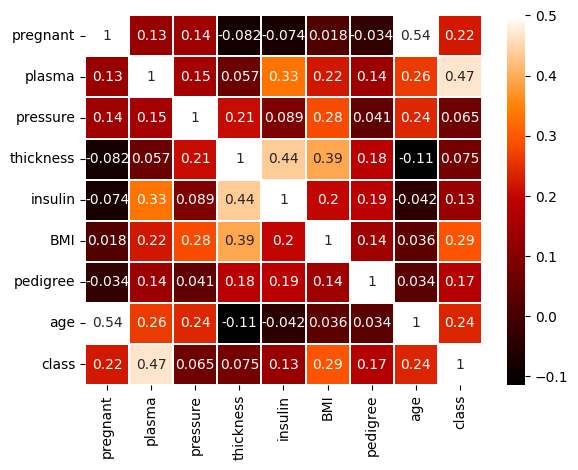

In [15]:
sns.heatmap(df.corr(), linewidths=0.1,vmax=0.5,
            cmap=plt.cm.gist_heat, linecolor='white',annot=True)

heatmap(): 두 항목씩 짝을 지은 뒤 각각 어떤 패턴으로 변화하는지를 관찰하는 함수 <br>
두 항목이 전혀 다른 패턴으로 변화하고 있으면 0을, 서로 비슷한 패턴으로 변할수록 1에 가까운 값 출력

vmax: 색상의 밝기를 조절하는 인자 <br>
cmap: 미리 정해진 matplotlib 색상의 설정값을 불러옴

In [16]:
plt.show() # 그래프 표시

숫자가 높을수록 밝은 색상으로 채워져있음 <br>
plasma와 class이 가장 상관관계가 높음 → 이 항목이 결론을 만드는 데 가장 중요한 역할을 한다고 예측

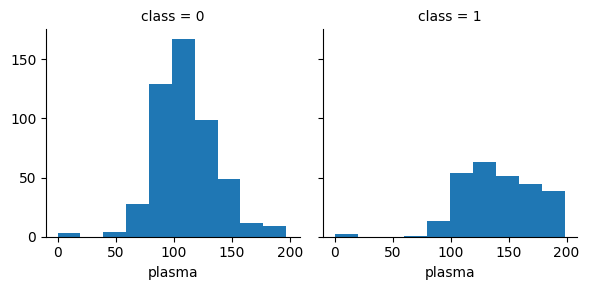

In [17]:
grid=sns.FacetGrid(df,col='class')
grid.map(plt.hist,'plasma',bins=10)
plt.show()

plasma 항목의 수치가 150 이상인 경우가 많다는 것을 알 수 있음

데이터 전처리 과정: 모아진 데이터에 빠진 값이 있다면 평균이나 중앙값으로 대치하는 등의 과정, 전혀 관계없는 이상 데이터가 끼어 있지는 않은지를 점검하는 과정 등이 포함됨.

<hr>

## 6. 피마 인디언의 당뇨병 예측 실행

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf

In [36]:
# seed 값 생성
numpy.random.seed(3)
tf.random.set_seed(3)

In [41]:
# 데이터 로드
dataset=numpy.loadtxt("/content/pima-indians-diabetes.csv",delimiter=",")
X=dataset[:,0:8]
Y=dataset[:,8]

In [42]:
# 모델의 설정
model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [43]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acuracy'])

####(결과가 왜 안 나올까...)

In [44]:
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200


TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


In [29]:
# 결과 출력
print("\n Accuracy: %.4f" %(model.evaluate(X,Y)[1]))

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1920, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable
